In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn


Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Variable you want to correct
ylist = ["R9"]#, "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi", "SigmaRR", 'CovarianceIetaIphi', 'PhoIso03', 'ChIso03', 'ChIso03worst']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
# Set the quantiles 
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [4]:
# Initialize the quantile regression object for mc
qr_mc_NoWeights= quantileRegression("mc")
qr_mc_ConWeights= quantileRegression("mc")
qr_mc_NoWeights2= quantileRegression("mc")
qr_mc_ConWeights2= quantileRegression("mc")

print "Load the mc dataframe"
startEvt = 0
stopEvt   = 2000000
print "Load the mc dataframe"
qr_mc_NoWeights.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_ConWeights.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_NoWeights2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)
qr_mc_ConWeights2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5", startEvt, stopEvt)

Load the mc dataframe
Load the mc dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [5]:
print "Get the corrected data-mc values"
import pandas as pd
qr_mc_NoWeights.correctAllY(X, ylist, quantiles, EBEE="EE",relativePath= "weights_NoWeights")
qr_mc_ConWeights.correctAllY(X, ylist, quantiles, EBEE="EE",relativePath= "weights_ConWeights")
qr_mc_NoWeights2.correctAllY(X, ylist, quantiles, EBEE="EB",relativePath= "weights_NoWeights")
qr_mc_ConWeights2.correctAllY(X, ylist, quantiles, EBEE="EB",relativePath= "weights_ConWeights")


dfmc_NoWeights= qr_mc_NoWeights.getDF()
dfmc_ConWeights= qr_mc_ConWeights.getDF()
dfmc_NoWeights2= qr_mc_NoWeights2.getDF()
dfmc_ConWeights2= qr_mc_ConWeights2.getDF()
frame1 = [dfmc_NoWeights, dfmc_NoWeights2]
data = pd.concat(frame1)
dfmc_NoWeights = data.reset_index()

frame2 = [dfmc_ConWeights, dfmc_ConWeights2]
data2 = pd.concat(frame2)
dfmc_ConWeights = data2.reset_index()

       

Get the corrected data-mc values
Loading corrected targets from :  correctedTargetsweights_NoWeights_EE.h5
Corrected variables file (e.g.  correctedTargetsweights_ConWeights_EE.h5  ) does not exists. This will take a while...
Correct EE :
ScEta  <  -1.57  or  1.57  <  ScEta
Loading mc weights for  R9  : 
    ./weights/weights_ConWeights/mc_weights_EE
Loading data weights for  R9
    ./weights/weights_ConWeights/data_weights_EE
Get corrections for  R9  with quantiles  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Features: X =  ['Pt', 'ScEta', 'Phi', 'rho']  target y =  R9
Writing correctedTargets_ EE .h5
Loading corrected targets from :  correctedTargetsweights_NoWeights_EB.h5
Corrected variables file (e.g.  correctedTargetsweights_ConWeights_EB.h5  ) does not exists. This will take a while...
Correct EB :
-1.4442  <  ScEta  and  ScEta  <  1.4442
Loading mc weights for  R9  : 
    ./weights/weights_ConWeights/mc_weights_EB
Loading data weights for  R9
    ./weights/weights_ConWeights/d

In [6]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvt = 0
stopEvt   = 2000000
print "Load the data dataframe"
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5", startEvt, stopEvt)
dfdata = qr_data.getDF()

Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [7]:
# Some basic plots
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

['R9']
plotting  R9
is the sum1? 1.0 1.0 1.0
is the sum1? 0.999999997704 0.999999994263 0.999999998006


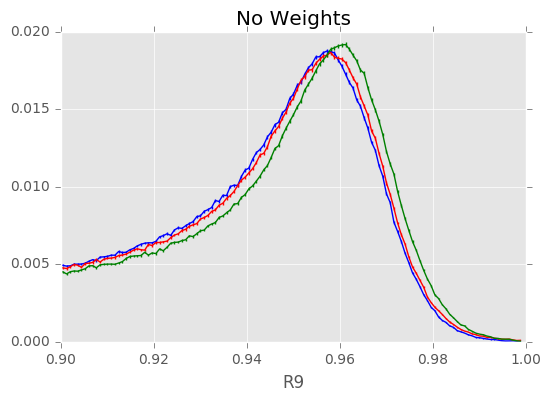

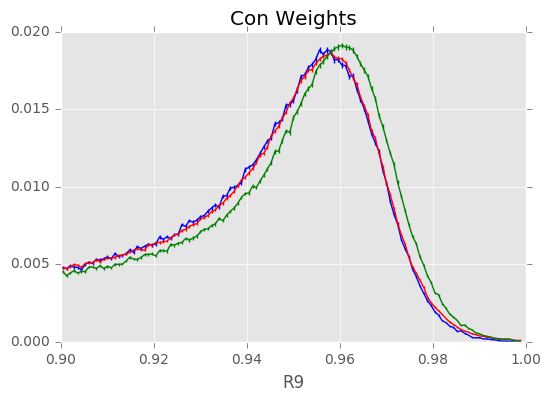

In [8]:
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.9,1.0,0.0008)
        rv3 = np.arange(0.5,0.95,0.008)
        
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.8,1.0,0.001)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.0,0.015,0.0001)
        rv2 = np.arange(0.015,0.030,0.0001)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0001)
        rv2 = np.arange(0.005,0.025,0.0001)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.001)
        rv2 = np.arange(0.0,0.05,0.0003)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0001)
        rv2 = np.arange(0.02, 0.05,0.0005)
    if yvar == "SigmaRR":
        rv = np.arange(1, 12.0,0.1) 
        rv2 = np.arange(1, 12.0,0.1)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.0000001) 
        rv2 = np.arange(-0.00005, 0.00005,0.0000001)
    if yvar == "PhoIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0,0.05)
    if yvar == "ChIso03":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.,0.05)
    if yvar == "ChIso03worst":
        rv = np.arange(-0.05, 0.05,0.0005) 
        rv2 = np.arange(0.1, 5.0, 0.05)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    
    #compute histograms:
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv2)
    edges = _edges[:len(_edges)-1]
    
    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr], rv2)
    edges = _edges[:len(_edges)-1]
    
    data_bins, _edges = np.histogram(dfdata[yvar], rv2)
    edges = _edges[:len(_edges)-1]
    
    #calculate error:
    edges = _edges[:len(_edges)-1]
    bincenters = 0.5*(_edges[1:]+_edges[:-1])
    width      = 0
    menStd     = np.sqrt(mc_bins)/float(np.sum(mc_bins))
    menStdCorr     = np.sqrt(mccorr_bins)/float(np.sum(mccorr_bins))
    menStddata     = np.sqrt(data_bins)/float(np.sum(data_bins))
    
    #normallize it in height:
    mccorr_bins=mccorr_bins/float(np.sum(mccorr_bins))
    mc_bins=mc_bins/float(np.sum(mc_bins))
    data_bins=data_bins/float(np.sum(data_bins))
    
    #check that the sum is 1 
    print "is the sum1?",sum(mccorr_bins),sum(mc_bins),sum(data_bins)
    #plot it
    plt.errorbar(bincenters, mccorr_bins,yerr=menStdCorr,  color='b', capsize=0)
    plt.errorbar(bincenters, data_bins, yerr=menStddata, color='r', capsize=0)
    plt.errorbar(bincenters, mc_bins,yerr=menStd,  color='g',capsize=0)
    
    ax.set_title('No Weights')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    mc_bins, _edges = np.histogram(dfmc_ConWeights[yvar], rv2, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv2,weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv2,weights=dfdata["weight"])
    edges = _edges[:len(_edges)-1]
    
    
    #calculate error -multiply by 0.1 weights?-
    edges = _edges[:len(_edges)-1]
    bincenters = 0.5*(_edges[1:]+_edges[:-1])
    width      = 0
    menStd     = np.sqrt(mc_bins*10)/float(np.sum(mc_bins*10))
    menStdCorr     = np.sqrt(mccorr_bins*10)/float(np.sum(mccorr_bins*10))
    menStddata     = np.sqrt(data_bins)/float(np.sum(data_bins))
    
    #normallize it in height:
    mccorr_bins=mccorr_bins/float(np.sum(mccorr_bins))
    mc_bins=mc_bins/float(np.sum(mc_bins))
    data_bins=data_bins/float(np.sum(data_bins))
    
    #check that the sum is 1 
    print "is the sum1?",sum(mccorr_bins),sum(mc_bins),sum(data_bins)
    #plot it
    plt.errorbar(bincenters, mccorr_bins,yerr=menStdCorr,  color='b', capsize=0)
    plt.errorbar(bincenters, data_bins, yerr=menStddata, color='r', capsize=0)
    plt.errorbar(bincenters, mc_bins,yerr=menStd,  color='g',capsize=0)
    ax.set_title('Con Weights')

['R9']
plotting  R9


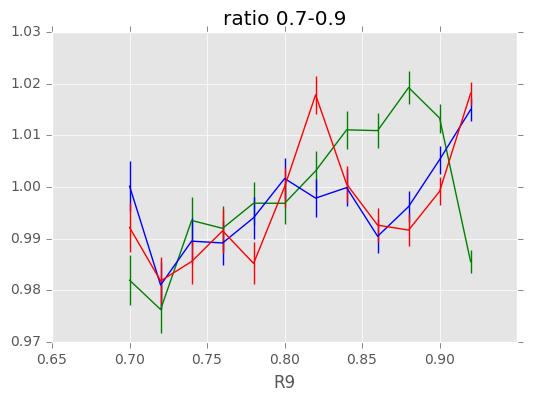

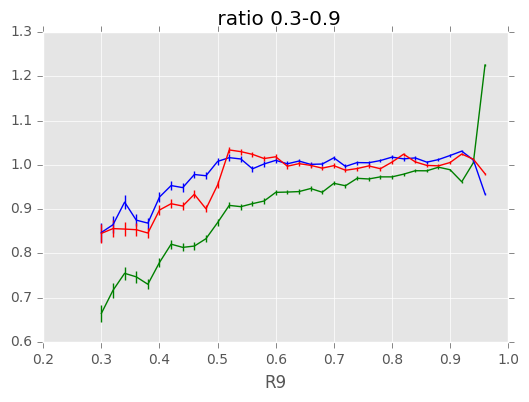

In [9]:
#ratio plots
print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    rv = []
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.001)
        rv2 = np.arange(0.3,1.0,0.02)
        rv3 = np.arange(0.7,0.95,0.02)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    
    #compute histogram
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv3)
    edges = _edges[:len(_edges)-1]
    
    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr],rv3)
    edges = _edges[:len(_edges)-1]
    
    data_bins, _edges = np.histogram(dfdata[yvar], rv3)
    edges = _edges[:len(_edges)-1]
    
    mccorr_bins1, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv3, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]
    
    #calculate error normalizing it in height
    bincenters = 0.5*(_edges[1:]+_edges[:-1])
    width      = 0
    menStdMc     = np.sqrt(mc_bins)/float(np.sum(mc_bins))
    menStdMcCorr     = np.sqrt(mccorr_bins)/float(np.sum(mccorr_bins))
    menStdData     = np.sqrt(data_bins)/float(np.sum(data_bins))
    menStdMcCorr1     = np.sqrt(mccorr_bins1)/float(np.sum(mccorr_bins1))
    
    #normallize histograms in height:
    mccorr_bins=mccorr_bins/float(np.sum(mccorr_bins))
    mc_bins=mc_bins/float(np.sum(mc_bins))
    data_bins=data_bins/float(np.sum(data_bins))
    mccorr_bins1=mccorr_bins1/float(np.sum(mccorr_bins1))
    
    #do the ratio
    h1 = mc_bins/data_bins
    h2 = mccorr_bins/data_bins
    h3 = mccorr_bins1/data_bins
    
    #propagate relative 
    h1er= menStdMc/data_bins
    h2er= menStdMcCorr/data_bins
    h3er= menStdMcCorr1/data_bins
    
    #plot
    plt.errorbar(edges,h1, yerr=h1er,capsize=0,color="g")# uncorrected
    plt.errorbar(edges,h2, yerr=h2er,capsize=0,color="b")#corrected
    plt.errorbar(edges,h3, yerr=h2er,capsize=0,color="r")#corrected with weights
    
    ax.set_title('ratio 0.7-0.9')
    
    #-------------------------------------------------------------------------
    
    fig1 = plt.figure()
    ax = fig1.add_subplot(111)
    ax.set_xlabel(yvar)
    
    mc_bins, _edges = np.histogram(dfmc_NoWeights[yvar], rv2)
    edges = _edges[:len(_edges)-1]

    mccorr_bins, _edges = np.histogram(dfmc_NoWeights[yvarcorr],rv2)
    edges = _edges[:len(_edges)-1]

    data_bins, _edges = np.histogram(dfdata[yvar], rv2)
    edges = _edges[:len(_edges)-1]
    
    mccorr_bins1, _edges = np.histogram(dfmc_ConWeights[yvarcorr], rv2, normed = 1, weights=dfmc_ConWeights["weight"])
    edges = _edges[:len(_edges)-1]
    
     #calculate error
    bincenters = 0.5*(_edges[1:]+_edges[:-1])
    width      = 0
    menStdMc     = np.sqrt(mc_bins)/float(np.sum(mc_bins))
    menStdMcCorr     = np.sqrt(mccorr_bins)/float(np.sum(mccorr_bins))
    menStdData     = np.sqrt(data_bins)/float(np.sum(data_bins))
    menStdMcCorr1     = np.sqrt(mccorr_bins1)/float(np.sum(mccorr_bins1))
    #normallize it in height:
    mccorr_bins=mccorr_bins/float(np.sum(mccorr_bins))
    mc_bins=mc_bins/float(np.sum(mc_bins))
    data_bins=data_bins/float(np.sum(data_bins))
    mccorr_bins1=mccorr_bins1/float(np.sum(mccorr_bins1))
    #do the ratio
    h1 = mc_bins/data_bins
    h2 = mccorr_bins/data_bins
    h3 = mccorr_bins1/data_bins
    #propagate relative error quadratically 
    h1er= menStdMc/data_bins
    h2er= menStdMcCorr/data_bins
    h3er= menStdMcCorr1/data_bins
    
    #plot
    plt.errorbar(edges,h1, yerr=h1er,capsize=0,color="g")# uncorrected
    plt.errorbar(edges,h2, yerr=h2er,capsize=0,color="b")#corrected
    plt.errorbar(edges,h3, yerr=h2er,capsize=0,color="r")#corrected with weights
    
    
    ax.set_title(' ratio 0.3-0.9')


In [10]:
#our variables are dfmc and dfdata, let's work with them.
#let's see how the profiles generally are.
#poors man profile plot
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

def Profile(x,y,nbins,xmin,xmax,ax, color):
    df = DataFrame({'x' : x , 'y' : y})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    
    for bin in bins:
        ProfileFrame.ix[bin,'ymean']      = df.ix[df['bin']==bin,'y'].mean()
        ProfileFrame.ix[bin,'yStandDev']  = df.ix[df['bin']==bin,'y'].std()
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color,capsize=0) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax

def ProfileWeighted(x,y,nbins,xmin,xmax,ax, color, weight):
    df = DataFrame({'x' : x , 'y' : y, 'weight': weight})
    
    binedges = xmin + ((xmax-xmin)/nbins) * np.arange(nbins+1)
    df['bin'] = np.digitize(df['x'],binedges)

    # print df
    
    bincenters = xmin + ((xmax-xmin)/nbins)*np.arange(nbins) + ((xmax-xmin)/(2*nbins))
    # print bincenters
    
    ProfileFrame = DataFrame({'bincenters' : bincenters, 'N' : df['bin'].value_counts(sort=False)},index=range(1,nbins+1))
    # ProfileFrame['N'] = ProfileFrame['N'].fillna(1)
    # print ProfileFrame['N']

    bins = ProfileFrame.index.values
    
    def WeightedMean(values, weights): 
        total_weight = weights.sum()
        #solve problem with division by zero in some bins.
        if total_weight==0:return values.mean()
        else: return (values * weights).sum() / float(total_weight)
    def WeightedStd(values, weights):
        total_weight = weights.sum()
        if total_weight==0: return values.std()
        else: return 1.0/ np.sqrt(float(total_weight))
    

    for bin in bins:
        y=df.ix[df['bin']==bin,'y']
        w=df.ix[df['bin']==bin,'weight']
        ProfileFrame.ix[bin,'ymean']      = WeightedMean(y,w)
        ProfileFrame.ix[bin,'yStandDev']  = WeightedStd(y,w)
        ProfileFrame.ix[bin,'yMeanError'] = ProfileFrame.ix[bin,'yStandDev'] / np.sqrt(ProfileFrame.ix[bin,'N'])

    ProfileFrame['ymean']      = ProfileFrame['ymean'].fillna(0)
    ProfileFrame['yMeanError'] = ProfileFrame['yMeanError'].fillna(0)
    ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], yerr=np.array(ProfileFrame['yMeanError']), c=color,capsize=0) #, xerr=(xmax-xmin)/(2*nbins), fmt=None) 
    #ax.errorbar(ProfileFrame['bincenters'], ProfileFrame['ymean'], c=color) 
    return ax



plotting  R9


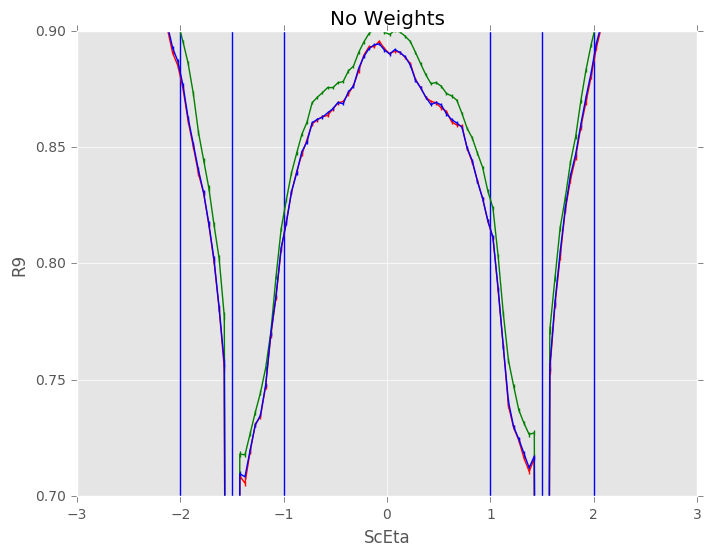

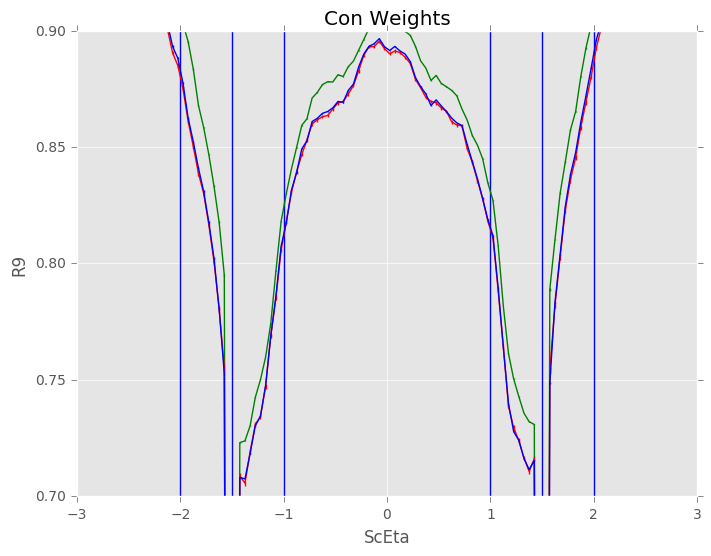

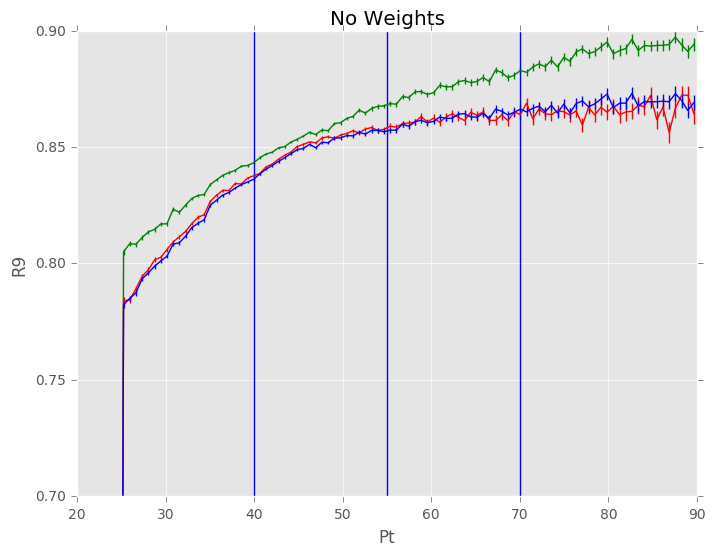

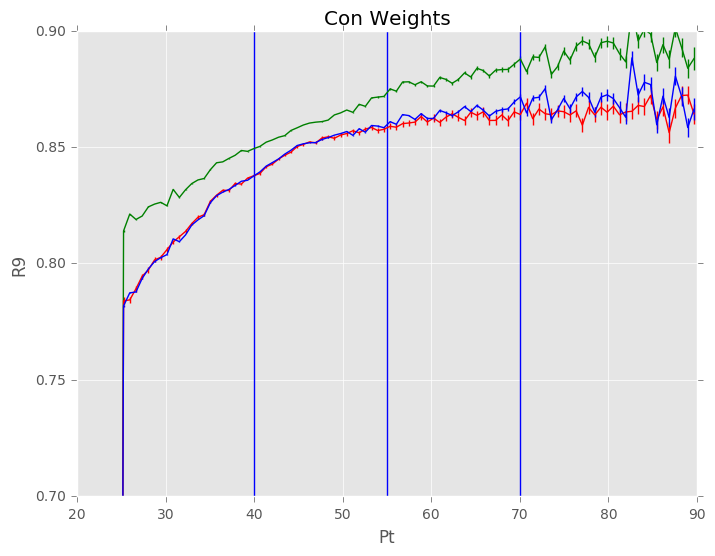

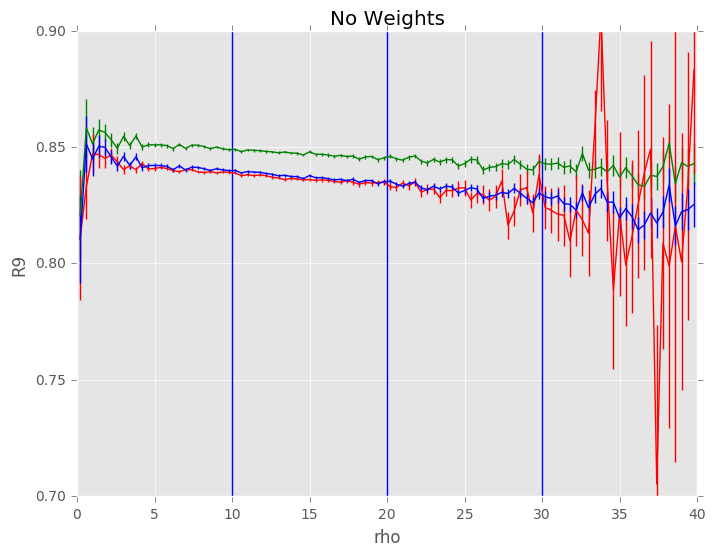

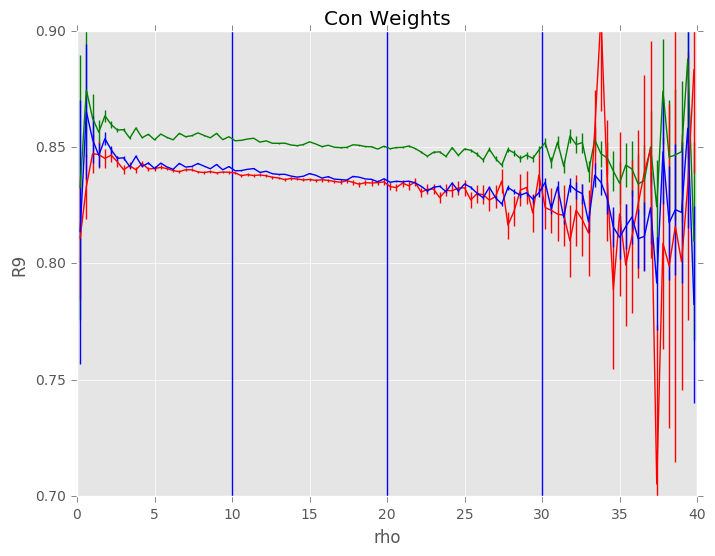

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

for yvar in ["R9"]:#, "S4", "SigmaIeIe", "EtaWidth"]:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar

    if yvar == "R9":
        minEB, maxEB = 0.7, 0.9
        minEE, maxEE = 0.7, 0.9
    

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=1)
    ax.axvline(x=-1)
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    ax.axvline(x=2)
    ax.axvline(x=-2)
    
    Profile(dfmc_NoWeights['ScEta']  , dfmc_NoWeights[yvar]        ,100,-2.5,2.5,ax,'green')
    Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red')
    Profile(dfmc_NoWeights['ScEta']  , dfmc_NoWeights[yvar+'_corr'],100,-2.5,2.5,ax, 'blue')
    ax.set_title('No Weights')  
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('ScEta')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=1)
    ax.axvline(x=-1)
    ax.axvline(x=1.5)
    ax.axvline(x=-1.5)
    ax.axvline(x=2)
    ax.axvline(x=-2)
    
    ProfileWeighted(dfmc_ConWeights['ScEta']  , dfmc_ConWeights[yvar]        ,100,-2.5,2.5,ax,'green',dfmc_ConWeights['weight'])
    Profile(dfdata['ScEta'], dfdata[yvar]      ,100,-2.5,2.5,ax, 'red')
    ProfileWeighted(dfmc_ConWeights['ScEta']  , dfmc_ConWeights[yvar+'_corr'],100,-2.5,2.5,ax, 'blue',dfmc_ConWeights['weight'])
    ax.set_title('Con Weights')  
#---------------------------------------------------------------------------------------------------------
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=40)
    ax.axvline(x=55)
    ax.axvline(x=70)
    
    Profile(dfmc_NoWeights['Pt']  , dfmc_NoWeights[yvar]        ,100,20.,90.,ax, 'green')
    Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red')
    Profile(dfmc_NoWeights['Pt']  , dfmc_NoWeights[yvar+'_corr'],100,20.,90.,ax, 'blue')
    ax.set_title('No Weights') 
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('Pt')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=40)
    ax.axvline(x=55)
    ax.axvline(x=70)
    
    ProfileWeighted(dfmc_ConWeights['Pt']  , dfmc_ConWeights[yvar]        ,100,20.,90.,ax, 'green',dfmc_ConWeights["weight"])
    Profile(dfdata['Pt'], dfdata[yvar]      ,100,20.,90.,ax, 'red')
    ProfileWeighted(dfmc_ConWeights['Pt']  , dfmc_ConWeights[yvar+'_corr'],100,20.,90.,ax, 'blue',dfmc_ConWeights["weight"])
    ax.set_title('Con Weights') 

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=10)
    ax.axvline(x=20)
    ax.axvline(x=30)
    
    Profile(dfmc_NoWeights['rho']  , dfmc_NoWeights[yvar]        ,100,0.,40.,ax, 'green')
    Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red')
    Profile(dfmc_NoWeights['rho']  , dfmc_NoWeights[yvar+'_corr'],100,0.,40.,ax, 'blue')
    ax.set_title('No Weights') 
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.set_ylim(minEB,maxEB)
    ax.set_xlabel('rho')
    ax.set_ylabel(yvar)
    
    ax.axvline(x=10)
    ax.axvline(x=20)
    ax.axvline(x=30)
    
    ProfileWeighted(dfmc_ConWeights['rho']  , dfmc_ConWeights[yvar]        ,100,0.,40.,ax, 'green',dfmc_ConWeights["weight"])
    Profile(dfdata['rho'], dfdata[yvar]      ,100,0.,40.,ax, 'red')
    ProfileWeighted(dfmc_ConWeights['rho']  , dfmc_ConWeights[yvar+'_corr'],100,0.,40.,ax, 'blue',dfmc_ConWeights["weight"])
    ax.set_title('Con Weights') 
